In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt

import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

import numpy as np
import numpy.linalg as la

from rbf import *
from spherepts import *
from torus_points import *
from sphere_gaussians import *

In [2]:
matplotlib.rcParams.update({'font.size': 20})

In [3]:
def sphere_gaussians(nodes):
    x = nodes[:,0]
    y = nodes[:,1]
    z = nodes[:,2]
    
    centers = np.array([
            [ 1, 0, 0],
            [5, 2, 4],
            [-1, 2, 8],
            [1, -3, 2],
            [-1, -2, -3],
            [-2, 1, -1],
            [7, 20, -4]
        ])
    centers = (centers.T * 1/np.sqrt(centers[:,0]**2 + centers[:,1]**2 + centers[:,2]**2)).T
    
#     shapes = np.array([1, 2, 1, 2, 1, 2, 1])
    shapes = np.arange(1,len(centers)+1)
    
    r2 = dist_outer(nodes, centers)**2 * -shapes[:,None]
    
    return np.sum(np.exp(r2),axis=0)

# Sphere

In [4]:
def cart_to_sphere(nodes):
    x = nodes[:,0]
    y = nodes[:,1]
    z = nodes[:,2]
    theta = np.arctan2(y, x)
    phi = np.arctan2(z, np.sqrt(x**2 + y**2))
    return theta, phi

In [4]:
nodes = gen_spiral_nodes(100)

<IPython.core.display.Javascript object>


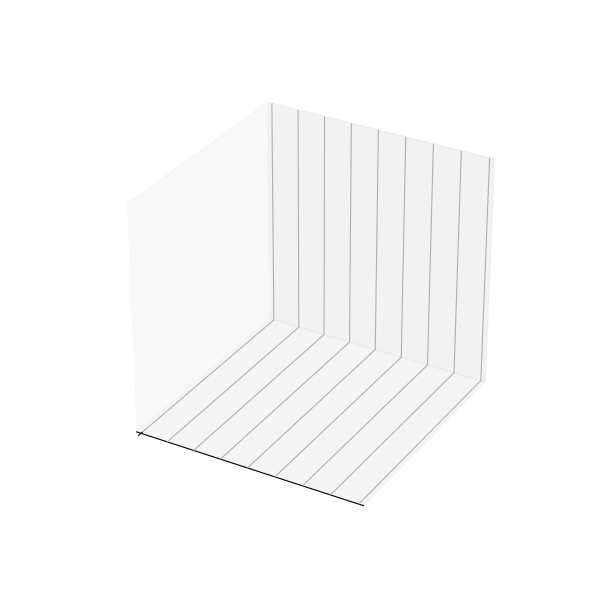

In [7]:
nodes = gen_spiral_nodes(100)
u, v = cart_to_sphere(np.block([[nodes],[nodes]]))
u = np.concatenate((u, np.array([np.pi, -np.pi]*50)))
v = np.concatenate((v, np.linspace(-np.pi/2, np.pi/2, 100)))
tri = mtri.Triangulation(u, v)

# u = np.linspace(0, 2 * np.pi, 100)
# v = np.linspace(0, np.pi, 100)
# x = np.outer(np.cos(u), np.sin(v))
# y = np.outer(np.sin(u), np.sin(v))
# z = np.outer(np.ones(np.size(u)), np.cos(v))

x = nodes[:,0]
y = nodes[:,1]
z = nodes[:,2]

indices = x>=-z

x = x[indices]
y = y[indices]
z = z[indices]


fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(np.cos(u)*np.cos(v), np.sin(u)*np.cos(v), np.sin(v), triangles=tri.triangles, cmap='Blues')

# ax.plot(x, y, z, marker='.', linestyle='None', color='k', zorder=10)

# ax.plot_trisurf(x, y, z, shade=False, color='blue', cmap='Blues', zorder=0)
ax.plot(x, y, z, marker='.', linestyle='None', label='Label', color='k')

# ax.plot_surface(x, y, z, zorder=10)
# plt.axis('off')

axlim = 1
ax.set_xlim(-axlim,axlim)
ax.set_ylim(-axlim,axlim)
ax.set_zlim(-axlim,axlim)
# plt.rc('text', usetex=True)
plt.show()

In [103]:
len(v)

200

In [175]:
nodes.shape

(1000, 3)

<IPython.core.display.Javascript object>


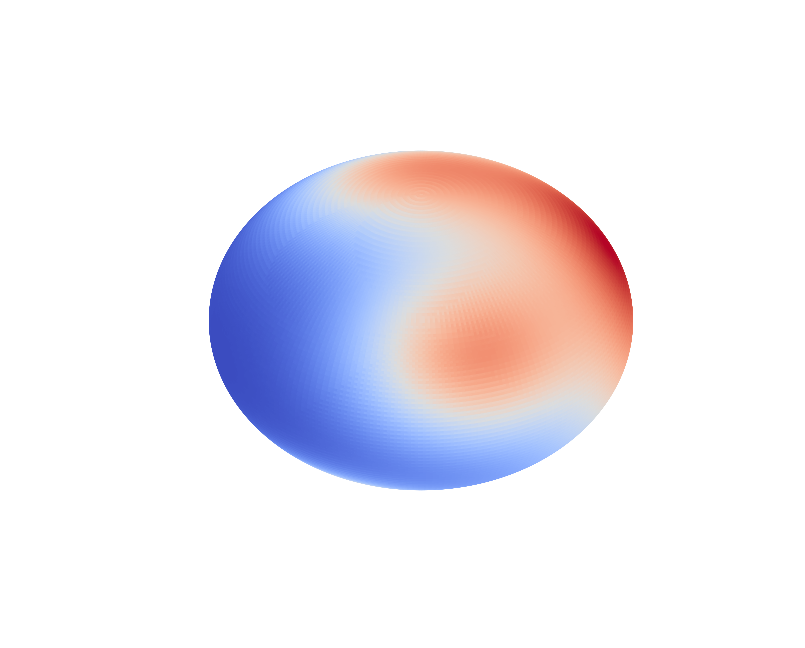

In [6]:
n_t, n_p = 200, 200

thetas = np.linspace(0, 2*np.pi, n_t)
phis = np.linspace(0, 2*np.pi, n_p)

U = np.outer(np.ones(n_p), thetas)
V = np.outer(phis, np.ones(n_t))

X = np.cos(U)*np.cos(V)
Y = np.sin(U)*np.cos(V)
Z = np.sin(V)

# foo, exact = get_sphere_gaussians()

# us = np.array([foo((x,y,z)) for x,y,z in zip(X.flatten(), Y.flatten(), Z.flatten())])

nodes = np.block([[X.flatten()],[Y.flatten()],[Z.flatten()]]).T

us = sphere_gaussians(nodes).reshape(X.shape)

centers = np.array([ [0,0,1],
                    [1,-1,1],
                    [2,0,1],
                    [-5,7,0],
                    [2,-13,1],
                    [2,12,-15],
                    [1,0,-1]], dtype=np.float)
for i, y in enumerate(centers):
        centers[i] = 1.0/la.norm(y)* y

val = us.reshape(X.shape)

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = val # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

# plot

fig = plt.figure(figsize=(5,5))
# plt.plot(centers[:,0], centers[:,1], centers[:,2], 'k.')
ax = fig.gca(projection='3d')
line = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)



axlim = .8
ax.set_xlim(-axlim,axlim)
ax.set_ylim(-axlim,axlim)
ax.set_zlim(-axlim,axlim)

plt.axis('off')
ax.grid(False)

# Torus

In [5]:
nodes, *temp = torus_phyllotaxis_points(2000)
temp = None

<IPython.core.display.Javascript object>


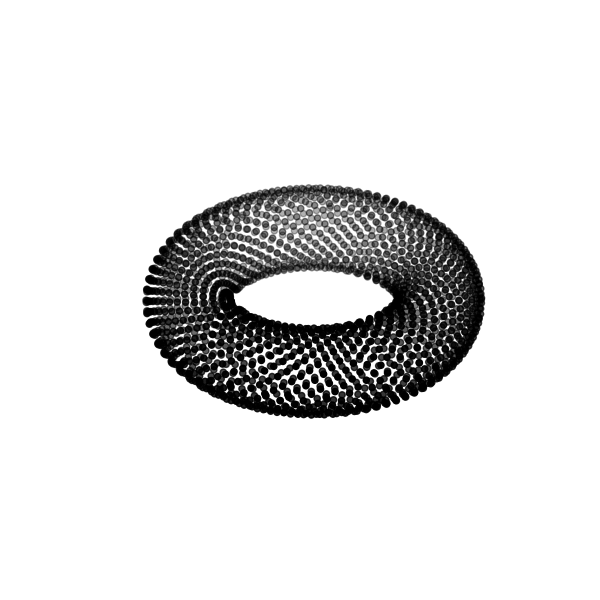

In [9]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nodes[:,0], nodes[:,1], nodes[:,2], marker='o', color='k')

axlim = 1

ax.set_xlim(-axlim,axlim)
ax.set_ylim(-axlim,axlim)
ax.set_zlim(-axlim,axlim)
plt.axis('off')

plt.show()

In [10]:
us, fs = torus_forcing(nodes)

In [14]:
data = np.block([nodes, us.reshape((len(us),1)), fs.reshape((len(fs),1))])

In [15]:
np.savetxt('torus_gaussians.csv', data)

<IPython.core.display.Javascript object>


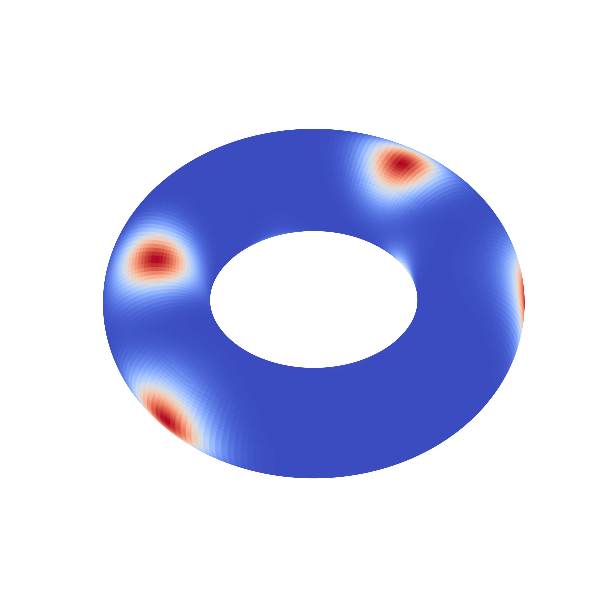

In [9]:
n_t, n_p = 200, 100

thetas = np.linspace(0, 2*np.pi, n_t)
phis = np.linspace(0, 2*np.pi, n_p)

U = np.outer(np.ones(n_p), thetas).flatten()
V = np.outer(phis, np.ones(n_t)).flatten()

nodes = torus_to_cart(U, V, 1, 1/3)

X = nodes[:, 0].reshape((n_p,n_t))
Y = nodes[:, 1].reshape((n_p,n_t))
Z = nodes[:, 2].reshape((n_p,n_t))

us, fs = torus_forcing(nodes)

val = us.reshape((n_p,n_t))

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = val # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

# plot

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
line = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)

axlim = .8
ax.set_xlim(-axlim,axlim)
ax.set_ylim(-axlim,axlim)
ax.set_zlim(-axlim,axlim)

plt.axis('off')
ax.grid(False)